<a href="https://colab.research.google.com/github/vikash06131721/Miscallaneous/blob/master/atlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installs 

In [0]:
# ! pip install osmnx
# ! sudo apt install python3-rtree

# Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
from geopy.distance import vincenty
from sklearn.metrics import pairwise_distances

%matplotlib inline

In [0]:
place_name = "New Delhi, India"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

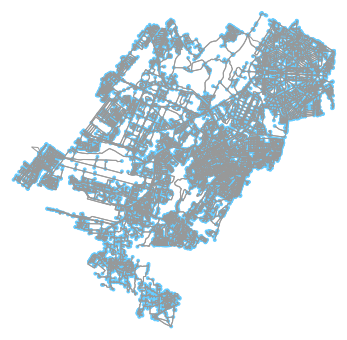

In [0]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


In [0]:
# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)

# Retrieve buildings from the area
buildings = ox.footprints_from_place(place=place_name, footprint_type='building')

# What types are those?
print(type(area))



<class 'geopandas.geodataframe.GeoDataFrame'>


In [0]:
buildings.head(3)

,access,addr:city,addr:country,addr:housename,addr:housenumber,addr:place,addr:postcode,addr:state,addr:street,addr:suburb,aeroway,air_conditioning,alt_name,alt_name:short,amenity,area,atm,barrier,brand,brand:wikidata,brand:wikipedia,building,building:levels,check_date,construction,contact:email,contact:phone,content,country,cuisine,denomination,description,diplomatic,drive_through,ele,email,embassy,fee,geometry,government,...,nodes,note,office,old_name,opening_hours,opening_hours:cinema,opening_hours:restaurant,operator,outdoor_seating,owner,parking,payment:cash,phone,power,railway,religion,rooms,shop,short_name,smoking,social_facility,social_facility:for,source,sport,stars,start_date,station,substation,subway,takeaway,target,telephone,toilets:wheelchair,tourism,type,water,website,wheelchair,wikidata,wikipedia
7891819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,school,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((77.1675024 28.5421965, 77.1676997999...",NaN,...,"[58043990, 58043991, 58043992, 58043993, 58043...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34940752,NaN,New Delhi,NaN,NaN,10,NaN,110070,NaN,"Institutional Area, Vasant Kunj",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((77.1478978 28.5450099, 77.147677 28....",NaN,...,"[410057522, 410057523, 410057524, 410057526, 4...",NaN,educational_institution,NaN,08:30-17:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35261858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...",NaN,...,"[413317829, 413317830, 2353491281, 413317831, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q56045868,NaN


In [0]:
places = ox.footprints_from_place(place=place_name, footprint_type='place')

In [0]:
places.head()

,addr:city,addr:district,addr:postcode,geometry,landuse,name,nodes,place
260067983,NaN,NaN,NaN,"POLYGON ((77.10008879999999 28.5798482, 77.099...",residential,Prahladpur,"[2655595200, 2655595174, 1986129436, 198612943...",locality
260083331,NaN,NaN,NaN,"POLYGON ((77.143164 28.5796705, 77.1431485 28....",residential,Jharera,"[3858542483, 2655730025, 2655730013, 270667396...",locality
264996280,NaN,NaN,NaN,"POLYGON ((77.11684630000001 28.623311, 77.1177...",residential,Green View Apartments,"[2706581813, 2706581832, 2706581810, 270658186...",neighbourhood
264998333,NaN,NaN,NaN,"POLYGON ((77.11417350000001 28.6224929, 77.112...",residential,Delhi Milk Scheme Colony,"[2706590606, 2706590621, 2706581849, 270659063...",neighbourhood
608685269,New Delhi,Delhi Cantonment,110010,"POLYGON ((77.13199520000001 28.5401769, 77.137...",military,Shankar Vihar,"[2656160053, 5766241289, 2008921711, 200892172...",suburb


In [0]:
print (places['geometry'][260067983])

POLYGON ((77.10008879999999 28.5798482, 77.0991538 28.5790389, 77.10055490000001 28.578648, 77.10091730000001 28.57963, 77.10008879999999 28.5798482))


A GeoDataFrame may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column. The geometry column contains the details of polygon structure for a given area.

In [0]:
print ('Polygon representation of New Delhi')
area

Polygon representation of New Delhi


,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,77.241075,28.645684,28.481263,77.048515,"POLYGON ((77.0485147 28.5566133, 77.0692889 28...","New Delhi, Delhi, India"


In [0]:
buildings.columns.values

array(['access', 'addr:city', 'addr:country', 'addr:housename',
       'addr:housenumber', 'addr:place', 'addr:postcode', 'addr:state',
       'addr:street', 'addr:suburb', 'aeroway', 'air_conditioning',
       'alt_name', 'alt_name:short', 'amenity', 'area', 'atm', 'barrier',
       'brand', 'brand:wikidata', 'brand:wikipedia', 'building',
       'building:levels', 'check_date', 'construction', 'contact:email',
       'contact:phone', 'content', 'country', 'cuisine', 'denomination',
       'description', 'diplomatic', 'drive_through', 'ele', 'email',
       'embassy', 'fee', 'geometry', 'government', 'height', 'historic',
       'int_name', 'internet_access', 'internet_access:fee', 'landuse',
       'layer', 'leisure', 'man_made', 'name', 'name:bn', 'name:ckb',
       'name:cs', 'name:de', 'name:dv', 'name:dz', 'name:en', 'name:es',
       'name:fr', 'name:he', 'name:hi', 'name:it', 'name:kn', 'name:ne',
       'name:nl', 'name:ru', 'name:si', 'name:sk', 'name:ta', 'name:uk',
       '

In [0]:
#let us concentrate on these columns
useful_columns =['addr:street','amenity','geometry','nodes','office','leisure','man_made','parking','building','name','description','area']
buildings[useful_columns].head()

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area
7891819,NaN,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",NaN,NaN,NaN,NaN,yes,School of Computional and Integrative Sciences,NaN,NaN
34940752,"Institutional Area, Vasant Kunj",NaN,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,NaN,NaN,NaN,yes,TERI University,NaN,NaN
35261858,NaN,NaN,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",NaN,NaN,NaN,NaN,yes,Terminal 2,NaN,NaN
38233945,NaN,NaN,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",NaN,NaN,NaN,NaN,yes,Terminal 1A (Domestic Departure),NaN,NaN
38234111,NaN,NaN,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",NaN,NaN,NaN,NaN,yes,Bird ExecuJet Hangar,NaN,NaN


In [0]:
buildings_useful = buildings[useful_columns]
buildings_useful.head()

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area
7891819,NaN,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",NaN,NaN,NaN,NaN,yes,School of Computional and Integrative Sciences,NaN,NaN
34940752,"Institutional Area, Vasant Kunj",NaN,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,NaN,NaN,NaN,yes,TERI University,NaN,NaN
35261858,NaN,NaN,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",NaN,NaN,NaN,NaN,yes,Terminal 2,NaN,NaN
38233945,NaN,NaN,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",NaN,NaN,NaN,NaN,yes,Terminal 1A (Domestic Departure),NaN,NaN
38234111,NaN,NaN,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",NaN,NaN,NaN,NaN,yes,Bird ExecuJet Hangar,NaN,NaN


In [0]:
buildings_useful['centroid'] = buildings_useful['geometry'].centroid
buildings_useful.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid
7891819,NaN,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",NaN,NaN,NaN,NaN,yes,School of Computional and Integrative Sciences,NaN,NaN,POINT (77.16776188358664 28.54186825274152)
34940752,"Institutional Area, Vasant Kunj",NaN,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,NaN,NaN,NaN,yes,TERI University,NaN,NaN,POINT (77.14844311313678 28.5443636416944)
35261858,NaN,NaN,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",NaN,NaN,NaN,NaN,yes,Terminal 2,NaN,NaN,POINT (77.08741102071744 28.55891055250316)


In [0]:
buildings['building'].value_counts()

yes                                           24529
residential                                     139
house                                            42
apartments                                       38
commercial                                       35
school                                           21
university                                       17
office                                           12
roof                                             11
greenhouse                                        9
public                                            6
hotel                                             5
transportation                                    5
train_station                                     4
retail                                            3
stadium                                           3
parking                                           2
gurudwara                                         2
hangar                                            2
hospital    

In [0]:
buildings_useful.head(3)

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid
7891819,NaN,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",NaN,NaN,NaN,NaN,yes,School of Computional and Integrative Sciences,NaN,NaN,POINT (77.16776188358664 28.54186825274152)
34940752,"Institutional Area, Vasant Kunj",NaN,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,NaN,NaN,NaN,yes,TERI University,NaN,NaN,POINT (77.14844311313678 28.5443636416944)
35261858,NaN,NaN,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",NaN,NaN,NaN,NaN,yes,Terminal 2,NaN,NaN,POINT (77.08741102071744 28.55891055250316)


In [0]:
buildings_useful['vals_centroid'] = buildings_useful['centroid'].map(lambda z: (z.x,z.y))
buildings_useful.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid
7891819,NaN,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",NaN,NaN,NaN,NaN,yes,School of Computional and Integrative Sciences,NaN,NaN,POINT (77.16776188358664 28.54186825274152),"(77.16776188358664, 28.54186825274152)"
34940752,"Institutional Area, Vasant Kunj",NaN,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,NaN,NaN,NaN,yes,TERI University,NaN,NaN,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)"
35261858,NaN,NaN,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",NaN,NaN,NaN,NaN,yes,Terminal 2,NaN,NaN,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)"
38233945,NaN,NaN,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",NaN,NaN,NaN,NaN,yes,Terminal 1A (Domestic Departure),NaN,NaN,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)"
38234111,NaN,NaN,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",NaN,NaN,NaN,NaN,yes,Bird ExecuJet Hangar,NaN,NaN,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)"


In [0]:
#vincenty can be used to find distance between two points if their coordiantes are given
vincenty(buildings_useful['vals_centroid'][7891819],buildings_useful['vals_centroid'][34940752]).kilometers

2.15760241961223

In [0]:
location_dict = dict(zip(buildings_useful['name'].values,buildings_useful['vals_centroid'].values))
location =buildings_useful['vals_centroid'][7891819]

In [0]:
buildings_useful.fillna(' ',inplace=True)
buildings_useful.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid
7891819,,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",,,,,yes,School of Computional and Integrative Sciences,,,POINT (77.16776188358664 28.54186825274152),"(77.16776188358664, 28.54186825274152)"
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)"
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)"
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)"
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)"


The function takes in a location's coordinates and location_dict and gives output the nearest points, the number of points can be taken by the argument n_avg

In [0]:

def closest_point(location, location_dict,n_avg):
    """ take a tuple of latitude and longitude and 
        compare to a dictonary of locations where
        key = location name and value = (lat, long)
        returns tuple of (closest_location , distance) """
    closest_location = []
    avg_distance = 0.0
    names =[]
    for city in location_dict.keys():
        distance = vincenty(location, location_dict[city]).kilometers
        if distance != 0.0:
          avg_distance +=distance
          closest_location.append((city,distance,location_dict[city][0],location_dict[city][1]))
          names.append(city)
          if len(closest_location)==n_avg:
            break
    return closest_location,avg_distance/n_avg,names
  
nearest_points= pd.DataFrame(closest_point(location=location,location_dict=location_dict,n_avg=20)[0],columns=['name','distance','lat','long'])
nearest_points =nearest_points.sort_values(by='distance',ascending=True)
nearest_points

,name,distance,lat,long
0,TERI University,2.157602,77.148443,28.544364
9,The Redemption Protestant Cathedral,4.264212,77.202022,28.617983
18,Parliament Museum,4.808815,77.207320,28.618715
17,Gol Dak Khana GPO,4.825180,77.206645,28.626944
16,Sacred Heart Catholic Cathedral,4.857010,77.206772,28.628703
3,Bird ExecuJet Hangar,5.389466,77.119796,28.566439
8,Krishi Bhavan,5.404976,77.213298,28.616027
2,Terminal 1A (Domestic Departure),5.496386,77.118726,28.561705
4,NaN,5.622507,77.213933,28.632582
15,FedEx,5.862609,77.118224,28.620172


In [0]:
location_ambience = (77.15493888258395, 28.54126022832975)
nearest_points_ambi= pd.DataFrame(closest_point(location=location_ambience,location_dict=location_dict,n_avg=20)[0],columns=['name','distance','lat','long'])
nearest_points_ambi =nearest_points.sort_values(by='distance',ascending=True)
nearest_points_ambi

,name,distance,lat,long
0,TERI University,2.157602,77.148443,28.544364
9,The Redemption Protestant Cathedral,4.264212,77.202022,28.617983
18,Parliament Museum,4.808815,77.207320,28.618715
17,Gol Dak Khana GPO,4.825180,77.206645,28.626944
16,Sacred Heart Catholic Cathedral,4.857010,77.206772,28.628703
3,Bird ExecuJet Hangar,5.389466,77.119796,28.566439
8,Krishi Bhavan,5.404976,77.213298,28.616027
2,Terminal 1A (Domestic Departure),5.496386,77.118726,28.561705
4,NaN,5.622507,77.213933,28.632582
15,FedEx,5.862609,77.118224,28.620172


In [0]:
df =buildings_useful[buildings_useful['name'].isin(nearest_points['name'])]
df.head()

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)"
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)"
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)"
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)"
44186070,Janpath,,"POLYGON ((77.2186626 28.6115315, 77.2198743 28...","[561254966, 561254967, 561254968, 561254969, 5...",,,,,yes,National Museum,,,POINT (77.21929181951036 28.61189988763303),"(77.21929181951036, 28.611899887633033)"


In [0]:
df_ambi =buildings_useful[buildings_useful['name'].isin(nearest_points_ambi['name'])]
df_ambi.head()

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)"
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)"
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)"
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)"
44186070,Janpath,,"POLYGON ((77.2186626 28.6115315, 77.2198743 28...","[561254966, 561254967, 561254968, 561254969, 5...",,,,,yes,National Museum,,,POINT (77.21929181951036 28.61189988763303),"(77.21929181951036, 28.611899887633033)"


Build a feature "avg_distance", which computes the average distance from a given point in terms of kms.

In [0]:
buildings_useful['nearest_places'] = buildings_useful['vals_centroid'].map(lambda x:closest_point(location=x,location_dict=location_dict,n_avg=50)[2])
buildings_useful['avg_distance'] = buildings_useful['vals_centroid'].map(lambda x: closest_point(location=x,location_dict=location_dict,n_avg=50)[1])
buildings_useful.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid,nearest_places,avg_distance
7891819,,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",,,,,yes,School of Computional and Integrative Sciences,,,POINT (77.16776188358664 28.54186825274152),"(77.16776188358664, 28.54186825274152)","[TERI University, Terminal 2, Terminal 1A (Dom...",5.106686
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)",[School of Computional and Integrative Science...,5.454486
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)",[School of Computional and Integrative Science...,9.103174
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)",[School of Computional and Integrative Science...,6.550787
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)",[School of Computional and Integrative Science...,6.491290


# Nearest Points For Some Places

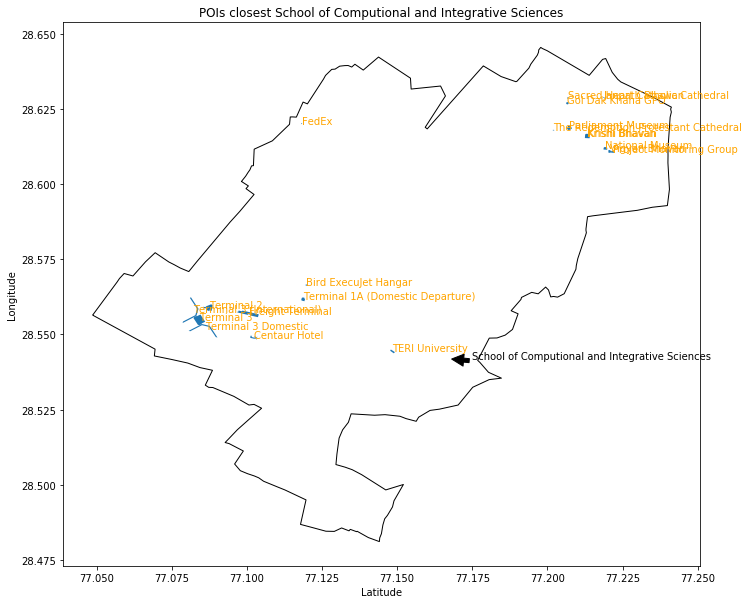

In [0]:
#nearest polygons for location='School of Computional and Integrative Sciences'
thistheta=[i for i in map(lambda x:x[0],df['vals_centroid'])]
thisr=[i for i in map(lambda x:x[1],df['vals_centroid'])]

text = list(df['name'].values)

ax = area.plot(color='white',figsize=(20,10),edgecolor='black')
df[['geometry']].plot(ax=ax,legend=True,markersize=0.8,figsize=(12,5))
ax.annotate('School of Computional and Integrative Sciences', location,xytext=(77.175, 28.54186825274152),
            arrowprops=dict(facecolor='black', shrink=0.05))
for i, txt in enumerate(text):
    ax.annotate(txt, (thistheta[i], thisr[i]),color='orange')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('POIs closest School of Computional and Integrative Sciences');

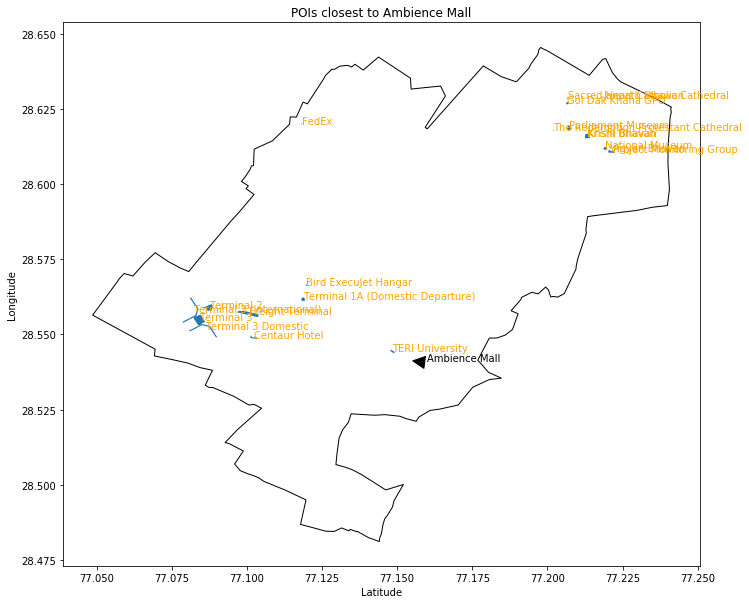

In [0]:
#nearest polygons for location='Ambience Mall'
lat_ambi=[i for i in map(lambda x:x[0],df_ambi['vals_centroid'])]
long_ambi=[i for i in map(lambda x:x[1],df_ambi['vals_centroid'])]

text_ambi = list(df_ambi['name'].values)

ax = area.plot(color='white',figsize=(20,10),edgecolor='black')
df_ambi[['geometry']].plot(ax=ax,legend=True,markersize=0.8,figsize=(12,5))
ax.annotate('Ambience Mall', location_ambience,xytext=(77.160, 28.54126022832975),
            arrowprops=dict(facecolor='black', shrink=0.05))

for i, txt in enumerate(text_ambi):
    ax.annotate(txt, (lat_ambi[i], long_ambi[i]),color='orange')
    
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('POIs closest to Ambience Mall');

In [0]:
buildings_useful.head()

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid,nearest_places,avg_distance
7891819,,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",,,,,yes,School of Computional and Integrative Sciences,,,POINT (77.16776188358664 28.54186825274152),"(77.16776188358664, 28.54186825274152)","[TERI University, Terminal 2, Terminal 1A (Dom...",5.106686
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)",[School of Computional and Integrative Science...,5.454486
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)",[School of Computional and Integrative Science...,9.103174
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)",[School of Computional and Integrative Science...,6.550787
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)",[School of Computional and Integrative Science...,6.491290


# Basic Pre-processing

In [0]:
#basic cleaning
import re

def clean_text(x):
  x = str(x)
  x= re.sub('[^A-Za-z0-9]+', ' ', x)
  x=x.lower()
  x = x.strip(' ')
  return x
buildings_useful['nearest_places_cleaned'] = buildings_useful['nearest_places'].map(lambda x: clean_text(x))
buildings_useful.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid,nearest_places,avg_distance,nearest_places_cleaned
7891819,,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",,,,,yes,School of Computional and Integrative Sciences,,,POINT (77.16776188358664 28.54186825274152),"(77.16776188358664, 28.54186825274152)","[TERI University, Terminal 2, Terminal 1A (Dom...",5.106686,teri university terminal 2 terminal 1a domesti...
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)",[School of Computional and Integrative Science...,5.454486,school of computional and integrative sciences...
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)",[School of Computional and Integrative Science...,9.103174,school of computional and integrative sciences...
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)",[School of Computional and Integrative Science...,6.550787,school of computional and integrative sciences...
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)",[School of Computional and Integrative Science...,6.491290,school of computional and integrative sciences...


# Generating Features From Text

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [0]:
texts = buildings_useful['nearest_places_cleaned'].values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [0]:
feats_frame = pd.DataFrame(X.toarray())

In [0]:
import numpy as np
feats_array = np.concatenate((X.toarray(),buildings_useful['avg_distance'].values.reshape(-1,1)),axis=1)
feats_array.shape

(24895, 103)

In [0]:
df.head()

,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid
34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)"
35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)"
38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)"
38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)"
44186070,Janpath,,"POLYGON ((77.2186626 28.6115315, 77.2198743 28...","[561254966, 561254967, 561254968, 561254969, 5...",,,,,yes,National Museum,,,POINT (77.21929181951036 28.61189988763303),"(77.21929181951036, 28.611899887633033)"


In [0]:
buildings_useful.reset_index(inplace=True)

In [0]:
nearest_places_computational_integrative = buildings_useful['nearest_places'][0]
nearest_places_ambi_mall = buildings_useful['nearest_places'][155]

In [0]:
buildings_useful[buildings_useful['name']=='nan'].index.values

array([], dtype=int64)

In [0]:
indices = [buildings_useful[buildings_useful['name']==i].index.values for i in nearest_places_computational_integrative]
indices_ambi =[buildings_useful[buildings_useful['name']==i].index.values for i in nearest_places_ambi_mall]

In [0]:
distance = []
for index in indices:
  try:
    ind = index[0]
    distance.append(pairwise_distances(X=feats_array[0].reshape(1,-1),Y=feats_array[ind].reshape(1,-1)))
  except IndexError:
    pass

In [0]:
np.mean(distance)

1.3366827546309765

In [0]:
distance_ambi = []
for index in indices_ambi:
  try:
    ind = index[0]
    distance_ambi.append(pairwise_distances(X=feats_array[28].reshape(1,-1),Y=feats_array[ind].reshape(1,-1)))
  except IndexError:
    pass

In [0]:
np.median(distance_ambi)

0.7494883930277675

The analysis was done to determine which clustering algorithm should we use in order to generate clusters. DBSCAN or K-Means, the pairwise distances were too close to use DBSCAN. The analysis is about what is the avg distance between a given point and top 20/50 points.


In [0]:
from sklearn.metrics import pairwise_distances,silhouette_score

In [0]:
from sklearn.cluster import KMeans


In [0]:
feats_array.shape

(24895, 103)

In [0]:
clusters =[2,3,4,5]

for cluster in clusters:
  clus = KMeans(n_clusters=cluster).fit_predict(feats_array)
  print (cluster,silhouette_score(feats_array, clus))

2 0.7796390231860909
3 0.7634236585860431
4 0.6365201705462342
5 0.6011287774283738


Silhoutte Score: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [0]:
clus_2 = KMeans(n_clusters=2)
clus_2.fit(feats_array)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = clus_2.labels_

In [0]:
buildings_useful['cluster_label_2'] = labels
buildings_useful.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,addr:street,amenity,geometry,nodes,office,leisure,man_made,parking,building,name,description,area,centroid,vals_centroid,nearest_places,avg_distance,nearest_places_cleaned,cluster_label_2
0,7891819,,school,"POLYGON ((77.1675024 28.5421965, 77.1676997999...","[58043990, 58043991, 58043992, 58043993, 58043...",,,,,yes,School of Computional and Integrative Sciences,,,POINT (77.16776188358664 28.54186825274152),"(77.16776188358664, 28.54186825274152)","[TERI University, Terminal 2, Terminal 1A (Dom...",5.106686,teri university terminal 2 terminal 1a domesti...,0
1,34940752,"Institutional Area, Vasant Kunj",,"POLYGON ((77.1478978 28.5450099, 77.147677 28....","[410057522, 410057523, 410057524, 410057526, 4...",educational_institution,,,,yes,TERI University,,,POINT (77.14844311313678 28.5443636416944),"(77.14844311313678, 28.544363641694403)",[School of Computional and Integrative Science...,5.454486,school of computional and integrative sciences...,0
2,35261858,,,"POLYGON ((77.0855147 28.5592408, 77.0862372 28...","[413317829, 413317830, 2353491281, 413317831, ...",,,,,yes,Terminal 2,,,POINT (77.08741102071744 28.55891055250316),"(77.08741102071744, 28.55891055250316)",[School of Computional and Integrative Science...,9.103174,school of computional and integrative sciences...,1
3,38233945,,,"POLYGON ((77.1182762 28.5621874, 77.1181046 28...","[450616029, 450616030, 450616031, 450616032, 4...",,,,,yes,Terminal 1A (Domestic Departure),,,POINT (77.11872631310918 28.56170496735412),"(77.11872631310918, 28.56170496735412)",[School of Computional and Integrative Science...,6.550787,school of computional and integrative sciences...,0
4,38234111,,,"POLYGON ((77.1195611 28.5662587, 77.1200245999...","[450619310, 450619311, 450619312, 450619313, 4...",,,,,yes,Bird ExecuJet Hangar,,,POINT (77.11979642478158 28.56643883858286),"(77.11979642478158, 28.566438838582858)",[School of Computional and Integrative Science...,6.491290,school of computional and integrative sciences...,0


In [0]:
buildings_useful['x'] = buildings_useful['vals_centroid'].map(lambda x: x[0])
buildings_useful['y'] = buildings_useful['vals_centroid'].map(lambda x: x[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
label_0 =buildings_useful[buildings_useful['cluster_label_2']==0]
label_1 =buildings_useful[buildings_useful['cluster_label_2']==1]


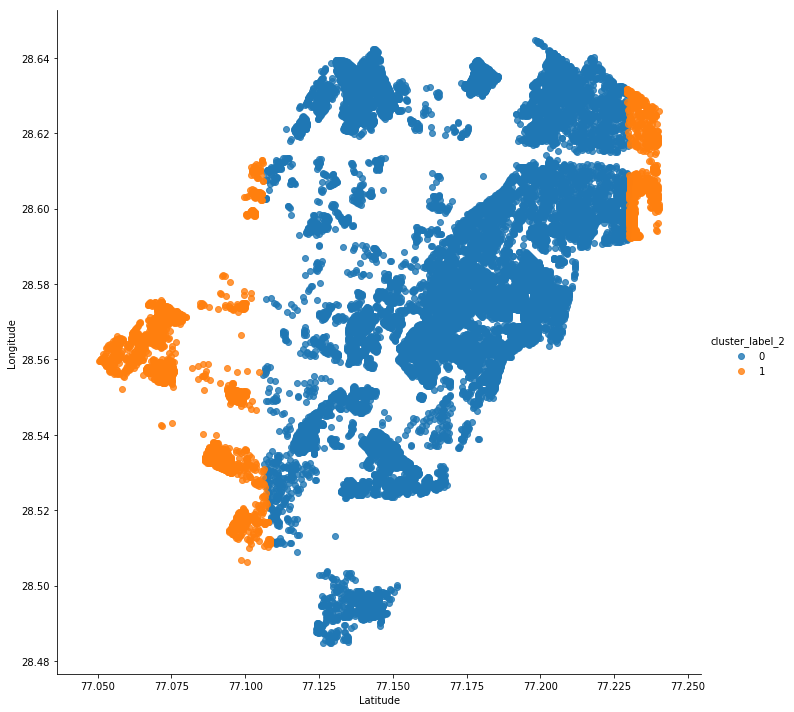

In [0]:
#plot data with seaborn
import seaborn as sns


facet = sns.lmplot(data=buildings_useful, x='x', y='y', hue='cluster_label_2', 
                   fit_reg=False, legend=True, legend_out=True,height=10)

facet.set_xlabels('Latitude')
facet.set_ylabels('Longitude')
facet.set_titles('Delhi When Divided In 2 Clusters')



In [0]:
import matplotlib.patches as mpatches

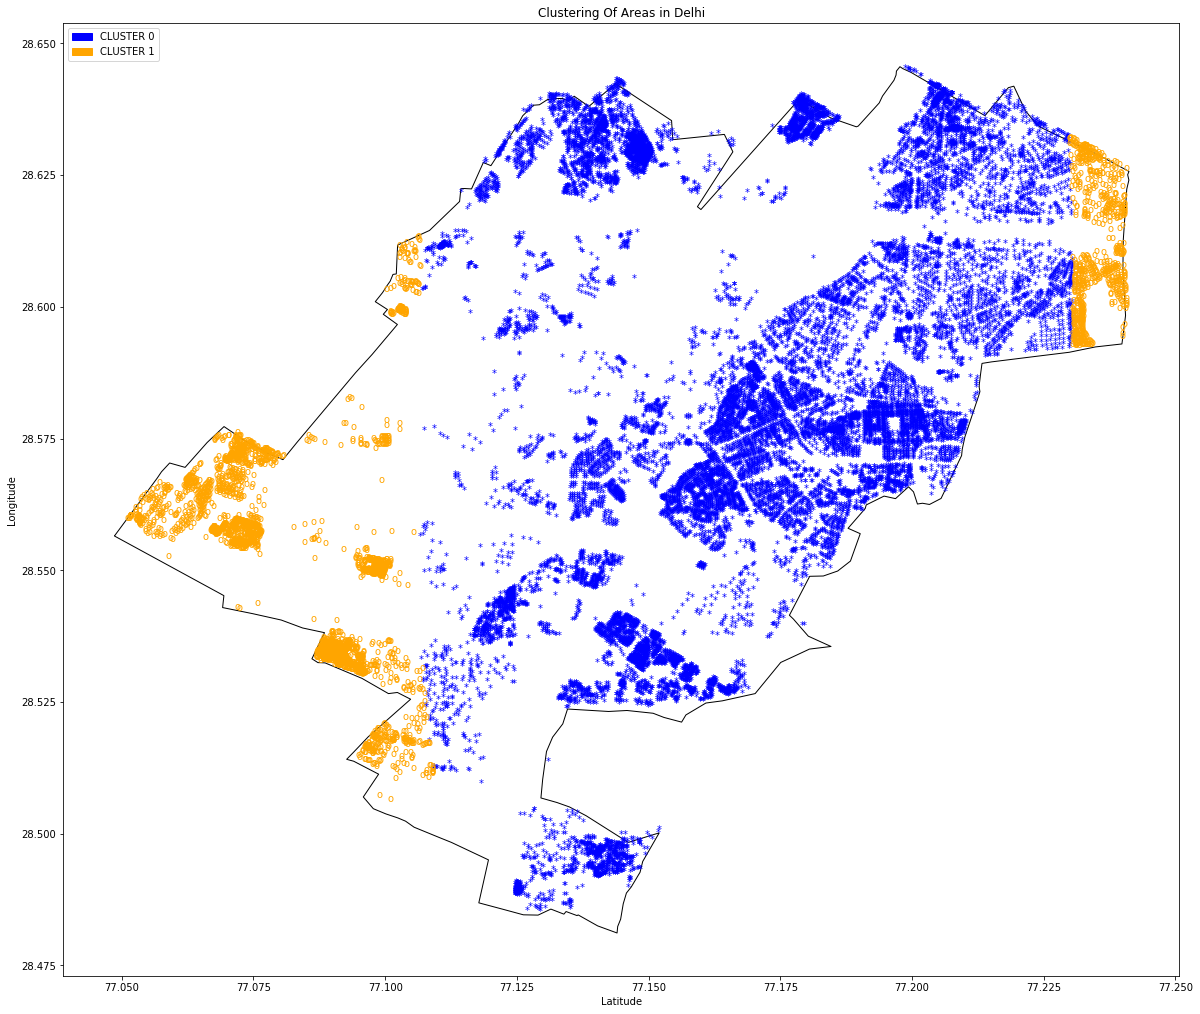

In [0]:
ax = area.plot(color='white',figsize=(20,20),edgecolor='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Clustering Of Areas in Delhi')

for lat,long in zip(label_0['x'].values,label_0['y'].values):
  ax.annotate('*',(lat,long),color='blue')
  
for lat,long in zip(label_1['x'].values,label_1['y'].values):
  ax.annotate('o',(lat,long),color='orange')
  
red_patch = mpatches.Patch(color='blue', label='CLUSTER 0')
blue_patch = mpatches.Patch(color='orange', label='CLUSTER 1')

ax.legend(handles=[red_patch, blue_patch],loc=2);

In [0]:
import matplotlib.colors as mcolors

In [0]:
color_keys = list(mcolors.CSS4_COLORS.keys())
non_white = []
white =['white','whitesmoke','snow','ghostwhite','azure','lavenderblush','aliceblue','antiquewhite','blue','black','green','cyan','magenta','yellow','red','darkcyan']
for color in color_keys:
  if color not in white:
      non_white.append(color)

In [0]:
amenities = buildings_useful['amenity'].unique()
color = ['blue','black','green','gold','magenta','firebrick','red','darkcyan',
         'forestgreen',
 'khaki',
 'beige',
 'darkviolet',
 'deepskyblue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'indianred',
 'cornsilk',
 'crimson',
 'darkgoldenrod']
len(color)

24

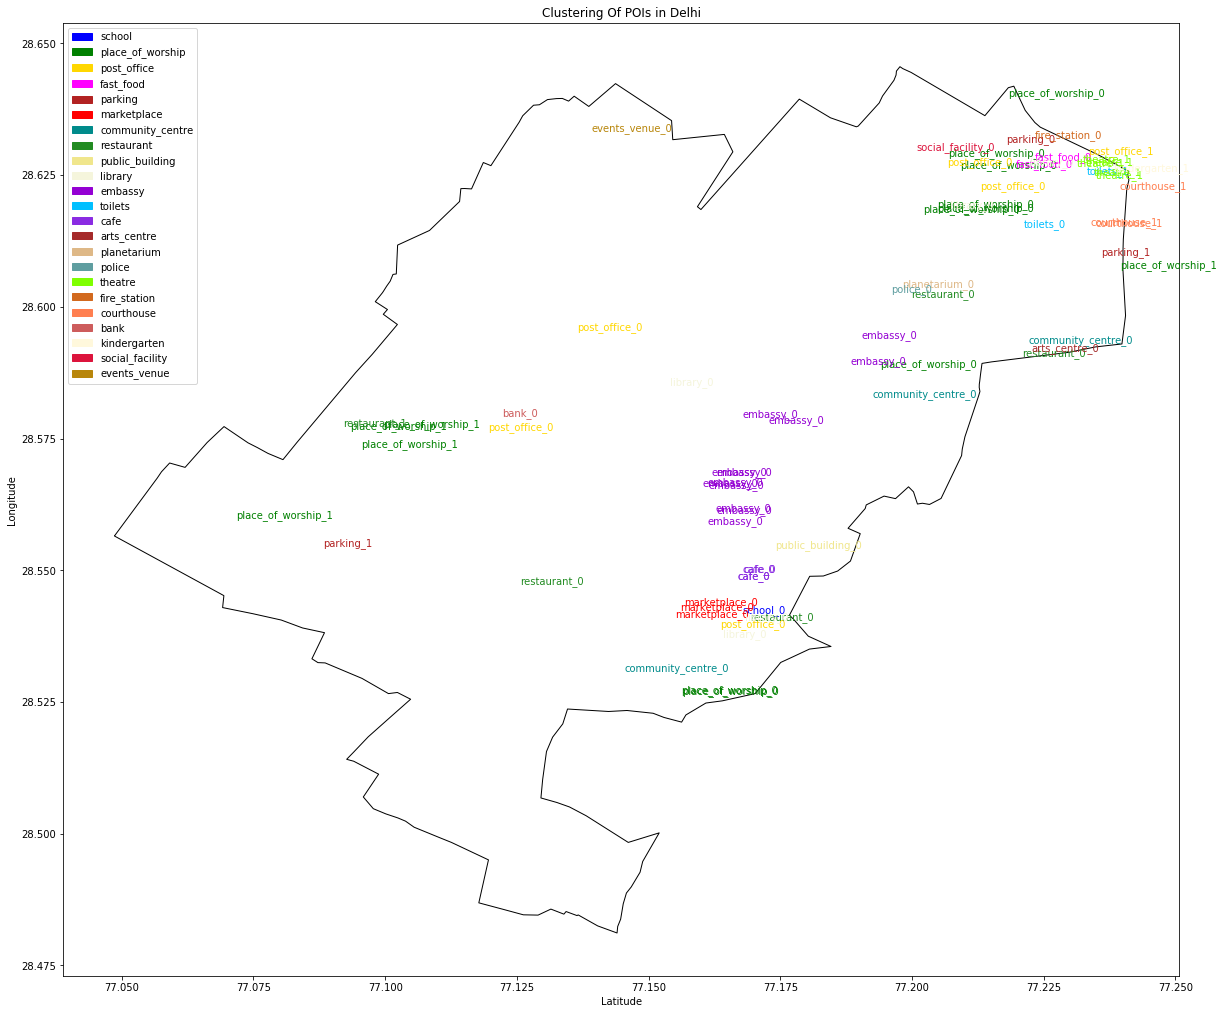

In [0]:
ax = area.plot(color='white',figsize=(20,20),edgecolor='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Clustering Of POIs in Delhi')
handles= []
amenities = buildings_useful['amenity'].unique()
for amenity,color_ in zip(amenities,color):
  
  if amenity !=' ':
    amenity_df = buildings_useful[buildings_useful['amenity']==amenity]
    handles.append(mpatches.Patch(color=color_, label=amenity))
    for text,lat,long,cluster in zip(amenity_df['amenity'].values,amenity_df['x'].values,amenity_df['y'].values,amenity_df['cluster_label_2'].values):
      ax.annotate(text+'_'+str(cluster),(lat,long),color=color_)
    

  

ax.legend(handles=handles,loc=2);